In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# GPU ni tekshirish
import torch
torch.cuda.is_available()

True

In [2]:
# kutbxonalarni chaqirib olish
import torch
import fastai

# versiyalarni tekshirish
print(torch.__version__)
print(fastai.__version__)

2.0.0
2.7.12


In [4]:
from fastai.vision.all import *
from ipywidgets import widgets

# path
path = Path("/kaggle/input/pnevmoniya/train")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# Datablock yaratamiz
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms= Resize(224)
)

# Dataloader yaratish
dls = transports.dataloaders(path)

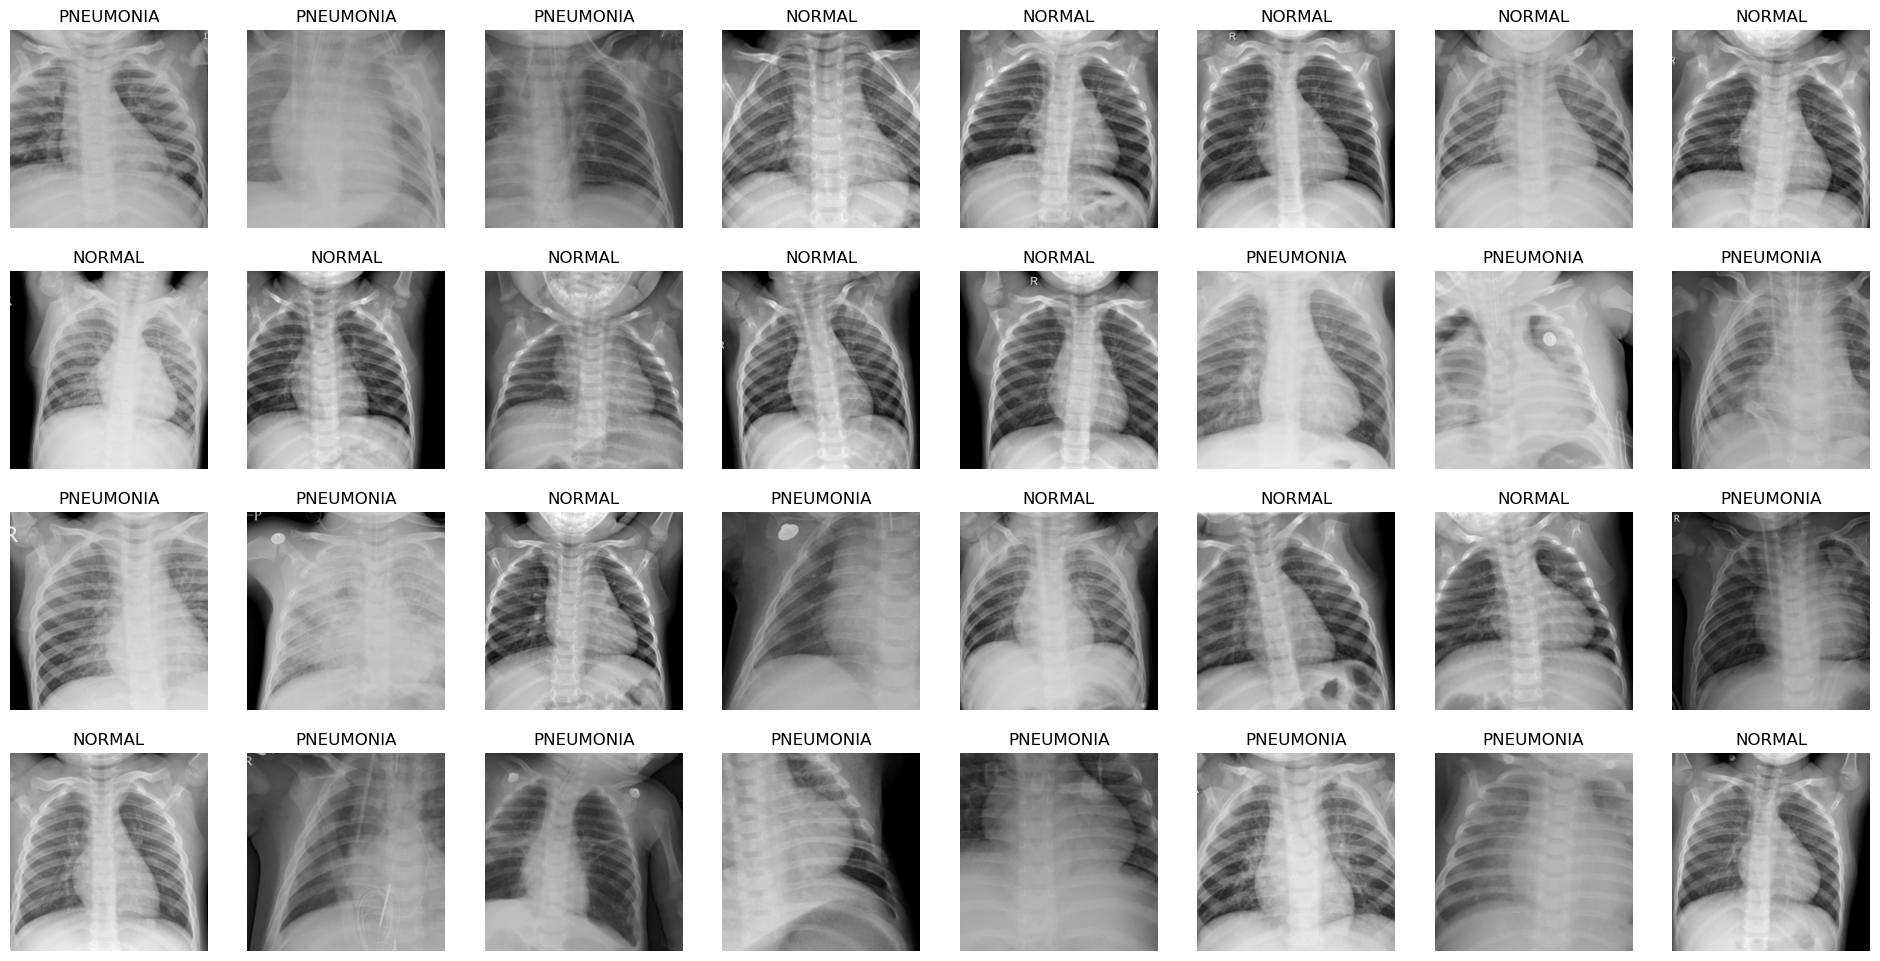

In [6]:
# datsetsni tekshirish
dls.train.show_batch(max_n=32, nrows = 4)

In [7]:
# training
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,0.465970,0.206324,0.939597,03:04


epoch,train_loss,valid_loss,accuracy,time
0,0.153246,0.079735,0.971237,01:57
1,0.095004,0.060892,0.976031,01:48
2,0.061123,0.049024,0.982742,01:50
3,0.028928,0.044090,0.984660,01:51


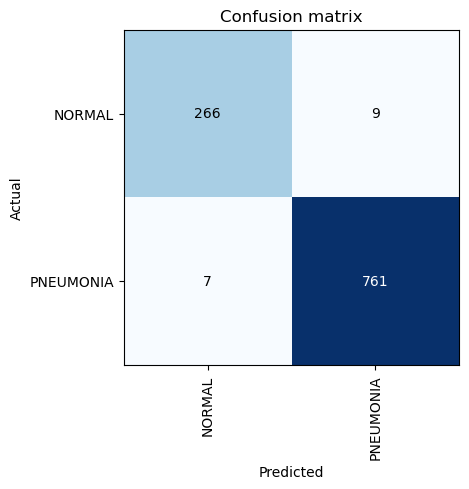

In [8]:
# tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

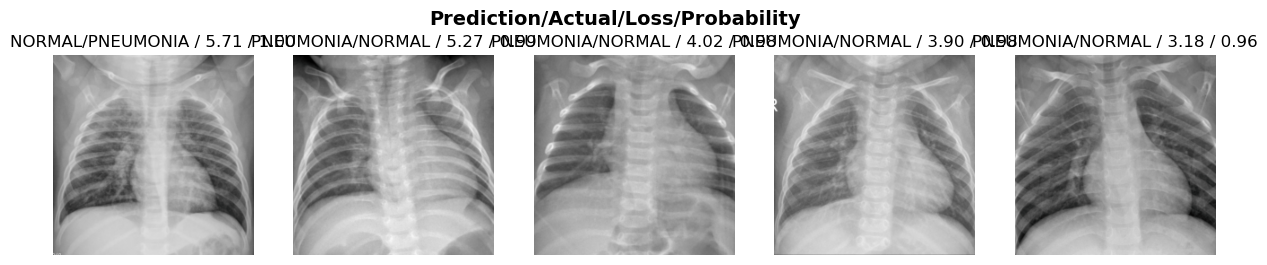

In [9]:
interp.plot_top_losses(5, nrows=1)

In [10]:
upload = widgets.FileUpload()
upload


FileUpload(value={}, description='Upload')

Bashorat: NORMAL
Ehtimollik: 70.8%


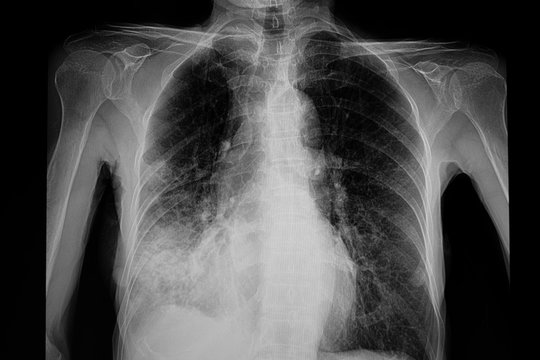

In [12]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Bashorat: {pred}")
print(f"Ehtimollik: {probs[pred_id]*100:.1f}%")
img


In [13]:
# test datasetni predict qilish
dic = {'NORMAL': 0, 'PNEUMONIA': 1}
ids = []
labels = []
path = Path('/kaggle/input/pnevmoniya/test')
image_paths = path.glob('*.jpeg')
for image in sorted(list(image_paths)):
    title = str(image).split("/")[-1]
    pred, pred_id, probs = learn.predict(image)
    ids.append(title)
    labels.append(dic[pred])

In [19]:
data = {'id': ids,'labels': labels}
answer = pd.DataFrame(data)
answer=answer.set_index("id")


In [20]:
answer.to_csv("answer.csv")